In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [28]:
iris = pd.read_csv("data/train.csv")

In [29]:
iris["Species"].value_counts()

Iris-versicolor    26
Iris-setosa        20
Name: Species, dtype: int64

In [30]:
types = iris.Species.drop_duplicates().values.tolist()
X = iris.drop("Id",axis=1).values
Y = iris["Species"].values

labels = dict(zip(types, range(len(iris))))
result = iris['SpeciesLabel'] = iris['Species'].replace(labels)

In [31]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesLabel
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [33]:
#data
data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SpeciesLabel']].values

In [34]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

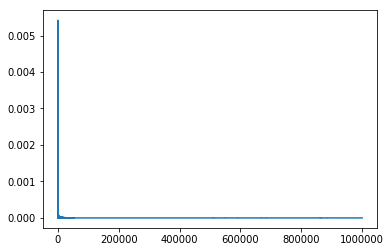

In [35]:
# training loop
learning_rate = 0.2
costs = []

# weights & bias value
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
b = np.random.randn()

for i in range(100000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    
    target = point[4]
    
    # cost function
    cost = np.square(prediction - target)
    
    # derivative of the cost function
    dcost_prediction = 2 * (prediction - target)
    
    # sigmoid_p which is defined above is the derivative of sigmoid
    dprediction_dz = sigmoid_p(z)
    
    # our input data & affecting 1 to the bias value
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_dw4 = point[3]
    dz_db = 1
    
    # the slope of the cost function
    dcost_dz = dcost_prediction * dprediction_dz
    
    # the slope of weights & bias value
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_dw4 = dcost_dz * dz_dw4
    dcost_db = dcost_dz * dz_db
    
    # getting the new weights & bias values
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    w4 = w4 - learning_rate * dcost_dw4
    b = b - learning_rate * dcost_db
    
    # this is just for the graph
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
            prediction = sigmoid(z)
            
            target = point[4]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [56]:
test_data = pd.read_csv("data/test.csv")

labels = dict(zip(types, range(len(test_data))))
result = test_data['SpeciesLabel'] = test_data['Species'].replace(labels)

data_inputs = test_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SpeciesLabel']].values
for i in range(len(data_inputs)) :
    point = data_inputs[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    target = point[4]
    
    print("prediction : {}" .format(prediction))

[ 5.4  3.4  1.7  0.2  0. ]
prediction : 0.00012315956338694343
[ 5.1  3.7  1.5  0.4  0. ]
prediction : 1.667611731798914e-05
[ 4.6  3.6  1.   0.2  0. ]
prediction : 1.0147945554881121e-06
[ 5.1  3.3  1.7  0.5  0. ]
prediction : 0.00043051606900162216
[ 4.8  3.4  1.9  0.2  0. ]
prediction : 0.0009296986905451935
[ 5.   3.   1.6  0.2  0. ]
prediction : 0.0005282896232918983
[ 5.   3.4  1.6  0.4  0. ]
prediction : 0.0001332368535877268
[ 5.2  3.5  1.5  0.2  0. ]
prediction : 2.5235374767196424e-05
[ 5.2  3.4  1.4  0.2  0. ]
prediction : 1.9475817441436483e-05
[ 4.7  3.2  1.6  0.2  0. ]
prediction : 0.0003106120757627973
[ 4.8  3.1  1.6  0.2  0. ]
prediction : 0.00042757346182547933
[ 5.4  3.4  1.5  0.4  0. ]
prediction : 4.351239098847922e-05
[ 5.2  4.1  1.5  0.1  0. ]
prediction : 1.6405102318329063e-06
[ 5.5  4.2  1.4  0.2  0. ]
prediction : 4.5966227197584173e-07
[ 4.9  3.1  1.5  0.1  0. ]
prediction : 0.00016350702519245087
[ 5.   3.2  1.2  0.2  0. ]
prediction : 1.4399287769849708e-0

In [52]:
# 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth, PetalLength, PetalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + PetalLength * w3 + PetalWidth * w4 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [53]:
guess_flower(4.8, 3.0, 1.4, 0.3)

Iris-setosa


In [54]:
guess_flower(5.1, 3.7, 1.5, 0.4)

Iris-setosa


In [55]:
guess_flower(6.7, 3.0, 5.0, 1.7)

Iris-versicolor
